In [14]:
%run main.ipynb

0    1775
1     104
Name: fraud, dtype: int64
0    0.944651
1    0.055349
Name: fraud, dtype: float64


In [13]:
# Table for training results
result_table = pd.DataFrame(columns=["Model", "Data Preparation", "Feature Count", "Features", 
                                     "Optimal Parameters", "Monetary Value Per Instance - Mean", 
                                     "Monetary Value Per Instance - Standard Deviation", 
                                     "Time needed", "Raw Model"])

# Model factory -> only SVC for in-depth analysis

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold

skf = StratifiedKFold(n_splits=10)

model_tuning_factory = [
#     GridSearchCV(SVC(), 
#                  dict(
#                      kernel = ['linear', 'poly', 'rbf', 'sigmoid'],
#                      degree = [1, 3, 6, 10],
#                      probability = [True, False],
#                      random_state = [12, 42, 75],
#                      shrinking = [True, False],
#                      class_weight = ['balanced', None]
#                  ),
#                  cv = skf,
#                  scoring = my_custom_score,
#                  n_jobs=4)
    
    
        GridSearchCV(SVC(), 
                 dict(
                     C = [1.5, 2.0, 40],
                     kernel = ['linear'],
                     class_weight = ['balanced'],
                     random_state = [42],
                 ),
                 cv = skf,
                 scoring = my_custom_score,
                 n_jobs = 4)
]           
                 
                 
iterations = 10                 
               
# model_tuning_factory_randomized = [
#     RandomizedSearchCV(KNeighborsClassifier(), 
#                  dict(
#                      n_neighbors = [1, 3, 5, 10, 15],
#                      weights = ['uniform', 'distance'],
#                      p = [1, 2, 3]
#                  ),
#                  cv = skf,
#                  scoring = my_custom_score,
#                  n_iter = iterations, 
#                  n_jobs=4)
# ]

In [15]:
run()

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/usr/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/usr/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x7fbf41c54c00, file "/...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/u/halle/mat/home_at/.local/lib/python3.6/site-p...ges/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/u/halle/mat/home_at/.local/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/u/halle/mat.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x7fbf41c54c00, file "/...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/u/halle/mat/home_at/.local/lib/python3.6/site-p...ges/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/u/halle/mat/home_at/.local/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/u/halle/mat.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/u/halle/mat/home_at/.local/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/u/halle/mat/home_at/.local/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/u/halle/mat/home_at/.local/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    500         if self.poller is not None:
    501             self.poller.start()
    502         self.kernel.start()
    503         self.io_loop = ioloop.IOLoop.current()
    504         try:
--> 505             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    506         except KeyboardInterrupt:
    507             pass
    508 
    509 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/u/halle/mat/home_at/.local/lib/python3.6/site-packages/tornado/platform/asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    143         except (RuntimeError, AssertionError):
    144             old_loop = None  # type: ignore
    145         try:
    146             self._setup_logging()
    147             asyncio.set_event_loop(self.asyncio_loop)
--> 148             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Uni...EventLoop running=True closed=False debug=False>>
    149         finally:
    150             asyncio.set_event_loop(old_loop)
    151 
    152     def stop(self) -> None:

...........................................................................
/usr/lib/python3.6/asyncio/base_events.py in run_forever(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
    422             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    423                                    finalizer=self._asyncgen_finalizer_hook)
    424         try:
    425             events._set_running_loop(self)
    426             while True:
--> 427                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_UnixS...EventLoop running=True closed=False debug=False>>
    428                 if self._stopping:
    429                     break
    430         finally:
    431             self._stopping = False

...........................................................................
/usr/lib/python3.6/asyncio/base_events.py in _run_once(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
   1435                         logger.warning('Executing %s took %.3f seconds',
   1436                                        _format_handle(handle), dt)
   1437                 finally:
   1438                     self._current_handle = None
   1439             else:
-> 1440                 handle._run()
        handle._run = <bound method Handle._run of <Handle IOLoop.add_...b/python3.6/site-packages/tornado/ioloop.py:690>>
   1441         handle = None  # Needed to break cycles when an exception occurs.
   1442 
   1443     def _set_coroutine_wrapper(self, enabled):
   1444         try:

...........................................................................
/usr/lib/python3.6/asyncio/events.py in _run(self=<Handle IOLoop.add_future.<locals>.<lambda>(<Fut...ib/python3.6/site-packages/tornado/ioloop.py:690>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <function IOLoop.add_future.<locals>.<lambda>>
        self._args = (<Future finished result=None>,)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
/u/halle/mat/home_at/.local/lib/python3.6/site-packages/tornado/ioloop.py in <lambda>(f=<Future finished result=None>)
    685             #
    686             # Wrap the callback in self._run_callback so we control
    687             # the error logging (i.e. it goes to tornado.log.app_log
    688             # instead of asyncio's log).
    689             future.add_done_callback(
--> 690                 lambda f: self._run_callback(functools.partial(callback, future))
        f = <Future finished result=None>
    691             )
    692         else:
    693             assert is_future(future)
    694             # For concurrent futures, we use self.add_callback, so

...........................................................................
/u/halle/mat/home_at/.local/lib/python3.6/site-packages/tornado/ioloop.py in _run_callback(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, callback=functools.partial(<function Runner.handle_yield....t 0x7fbf04b80268>, <Future finished result=None>))
    738         .. versionchanged:: 6.0
    739 
    740            CancelledErrors are no longer logged.
    741         """
    742         try:
--> 743             ret = callback()
        ret = undefined
        callback = functools.partial(<function Runner.handle_yield....t 0x7fbf04b80268>, <Future finished result=None>)
    744             if ret is not None:
    745                 from tornado import gen
    746 
    747                 # Functions that return Futures typically swallow all

...........................................................................
/u/halle/mat/home_at/.local/lib/python3.6/site-packages/tornado/gen.py in inner(f=None)
    776         elif not self.future.done():
    777 
    778             def inner(f: Any) -> None:
    779                 # Break a reference cycle to speed GC.
    780                 f = None  # noqa: F841
--> 781                 self.run()
    782 
    783             self.io_loop.add_future(self.future, inner)
    784             return False
    785         return True

...........................................................................
/u/halle/mat/home_at/.local/lib/python3.6/site-packages/tornado/gen.py in run(self=<tornado.gen.Runner object>)
    737                         finally:
    738                             # Break up a reference to itself
    739                             # for faster GC on CPython.
    740                             exc_info = None
    741                     else:
--> 742                         yielded = self.gen.send(value)
        yielded = undefined
        self.gen.send = <built-in method send of generator object>
        value = None
    743 
    744                 except (StopIteration, Return) as e:
    745                     self.finished = True
    746                     self.future = _null_future

...........................................................................
/u/halle/mat/home_at/.local/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_queue(self=<ipykernel.ipkernel.IPythonKernel object>)
    365         """
    366 
    367         while True:
    368             # receive the next message and handle it
    369             try:
--> 370                 yield self.process_one()
        self.process_one = <bound method Kernel.process_one of <ipykernel.ipkernel.IPythonKernel object>>
    371             except Exception:
    372                 self.log.exception("Error in message handler")
    373 
    374     _message_counter = Any(

...........................................................................
/u/halle/mat/home_at/.local/lib/python3.6/site-packages/tornado/gen.py in wrapper(*args=(<ipykernel.ipkernel.IPythonKernel object>,), **kwargs={})
    220                     # Runner). This keeps the coroutine's Runner alive.
    221                     # We do this by exploiting the public API
    222                     # add_done_callback() instead of putting a private
    223                     # attribute on the Future.
    224                     # (Github issues #1769, #2229).
--> 225                     runner = Runner(result, future, yielded)
        result = <generator object process_one>
        future = <Future pending>
        yielded = <Future finished result=(10, 21, <bound method.....70e6f60>, <zmq.sugar.fr...x7fbf38d2fb10>, ...]))>
    226                     future.add_done_callback(lambda _: runner)
    227                 yielded = None
    228                 try:
    229                     return future

...........................................................................
/u/halle/mat/home_at/.local/lib/python3.6/site-packages/tornado/gen.py in __init__(self=<tornado.gen.Runner object>, gen=None, result_future=None, first_yielded=None)
    703         self.running = False
    704         self.finished = False
    705         self.io_loop = IOLoop.current()
    706         if self.handle_yield(first_yielded):
    707             gen = result_future = first_yielded = None  # type: ignore
--> 708             self.run()
        self.run = <bound method Runner.run of <tornado.gen.Runner object>>
    709 
    710     def run(self) -> None:
    711         """Starts or resumes the generator, running until it reaches a
    712         yield point that is not ready.

...........................................................................
/u/halle/mat/home_at/.local/lib/python3.6/site-packages/tornado/gen.py in run(self=<tornado.gen.Runner object>)
    737                         finally:
    738                             # Break up a reference to itself
    739                             # for faster GC on CPython.
    740                             exc_info = None
    741                     else:
--> 742                         yielded = self.gen.send(value)
        yielded = undefined
        self.gen.send = <built-in method send of generator object>
        value = (10, 21, <bound method Kernel.dispatch_shell of <ipykernel.ipkernel.IPythonKernel object>>, (<zmq.eventloop.zmqstream.ZMQStream object>, [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]))
    743 
    744                 except (StopIteration, Return) as e:
    745                     self.finished = True
    746                     self.future = _null_future

...........................................................................
/u/halle/mat/home_at/.local/lib/python3.6/site-packages/ipykernel/kernelbase.py in process_one(self=<ipykernel.ipkernel.IPythonKernel object>, wait=True)
    352         else:
    353             try:
    354                 priority, t, dispatch, args = self.msg_queue.get_nowait()
    355             except QueueEmpty:
    356                 return None
--> 357         yield gen.maybe_future(dispatch(*args))
        dispatch = <bound method Kernel.dispatch_shell of <ipykernel.ipkernel.IPythonKernel object>>
        args = (<zmq.eventloop.zmqstream.ZMQStream object>, [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    358 
    359     @gen.coroutine
    360     def dispatch_queue(self):
    361         """Coroutine to preserve order of message handling

...........................................................................
/u/halle/mat/home_at/.local/lib/python3.6/site-packages/tornado/gen.py in wrapper(*args=(<ipykernel.ipkernel.IPythonKernel object>, <zmq.eventloop.zmqstream.ZMQStream object>, [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]), **kwargs={})
    204                 # avoid the cost of creating a Runner when the coroutine
    205                 # never actually yields, which in turn allows us to
    206                 # use "optional" coroutines in critical path code without
    207                 # performance penalty for the synchronous case.
    208                 try:
--> 209                     yielded = next(result)
        yielded = undefined
        result = <generator object dispatch_shell>
    210                 except (StopIteration, Return) as e:
    211                     future_set_result_unless_cancelled(
    212                         future, _value_from_stopiteration(e)
    213                     )

...........................................................................
/u/halle/mat/home_at/.local/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'run()', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 5, 8, 16, 34, 47, 972416, tzinfo=tzutc()), 'msg_id': '7fef10cdad2d451e86d597a90ea4d169', 'msg_type': 'execute_request', 'session': '1d2c476d47df4e548cee37f1f95e3f9d', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '7fef10cdad2d451e86d597a90ea4d169', 'msg_type': 'execute_request', 'parent_header': {}})
    262             try:
    263                 self.pre_handler_hook()
    264             except Exception:
    265                 self.log.debug("Unable to signal in pre_handler_hook:", exc_info=True)
    266             try:
--> 267                 yield gen.maybe_future(handler(stream, idents, msg))
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'1d2c476d47df4e548cee37f1f95e3f9d']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'run()', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 5, 8, 16, 34, 47, 972416, tzinfo=tzutc()), 'msg_id': '7fef10cdad2d451e86d597a90ea4d169', 'msg_type': 'execute_request', 'session': '1d2c476d47df4e548cee37f1f95e3f9d', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '7fef10cdad2d451e86d597a90ea4d169', 'msg_type': 'execute_request', 'parent_header': {}}
    268             except Exception:
    269                 self.log.error("Exception in message handler:", exc_info=True)
    270             finally:
    271                 try:

...........................................................................
/u/halle/mat/home_at/.local/lib/python3.6/site-packages/tornado/gen.py in wrapper(*args=(<ipykernel.ipkernel.IPythonKernel object>, <zmq.eventloop.zmqstream.ZMQStream object>, [b'1d2c476d47df4e548cee37f1f95e3f9d'], {'buffers': [], 'content': {'allow_stdin': True, 'code': 'run()', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 5, 8, 16, 34, 47, 972416, tzinfo=tzutc()), 'msg_id': '7fef10cdad2d451e86d597a90ea4d169', 'msg_type': 'execute_request', 'session': '1d2c476d47df4e548cee37f1f95e3f9d', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '7fef10cdad2d451e86d597a90ea4d169', 'msg_type': 'execute_request', 'parent_header': {}}), **kwargs={})
    204                 # avoid the cost of creating a Runner when the coroutine
    205                 # never actually yields, which in turn allows us to
    206                 # use "optional" coroutines in critical path code without
    207                 # performance penalty for the synchronous case.
    208                 try:
--> 209                     yielded = next(result)
        yielded = undefined
        result = <generator object execute_request>
    210                 except (StopIteration, Return) as e:
    211                     future_set_result_unless_cancelled(
    212                         future, _value_from_stopiteration(e)
    213                     )

...........................................................................
/u/halle/mat/home_at/.local/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'1d2c476d47df4e548cee37f1f95e3f9d'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'run()', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 5, 8, 16, 34, 47, 972416, tzinfo=tzutc()), 'msg_id': '7fef10cdad2d451e86d597a90ea4d169', 'msg_type': 'execute_request', 'session': '1d2c476d47df4e548cee37f1f95e3f9d', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '7fef10cdad2d451e86d597a90ea4d169', 'msg_type': 'execute_request', 'parent_header': {}})
    529             self._publish_execute_input(code, parent, self.execution_count)
    530 
    531         reply_content = yield gen.maybe_future(
    532             self.do_execute(
    533                 code, silent, store_history,
--> 534                 user_expressions, allow_stdin,
        user_expressions = {}
        allow_stdin = True
    535             )
    536         )
    537 
    538         # Flush output before sending the reply.

...........................................................................
/u/halle/mat/home_at/.local/lib/python3.6/site-packages/tornado/gen.py in wrapper(*args=(<ipykernel.ipkernel.IPythonKernel object>, 'run()', False, True, {}, True), **kwargs={})
    204                 # avoid the cost of creating a Runner when the coroutine
    205                 # never actually yields, which in turn allows us to
    206                 # use "optional" coroutines in critical path code without
    207                 # performance penalty for the synchronous case.
    208                 try:
--> 209                     yielded = next(result)
        yielded = undefined
        result = <generator object do_execute>
    210                 except (StopIteration, Return) as e:
    211                     future_set_result_unless_cancelled(
    212                         future, _value_from_stopiteration(e)
    213                     )

...........................................................................
/u/halle/mat/home_at/.local/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='run()', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    289                     res = yield coro_future
    290             else:
    291                 # runner isn't already running,
    292                 # make synchronous call,
    293                 # letting shell dispatch to loop runners
--> 294                 res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        code = 'run()'
        store_history = True
        silent = False
    295         finally:
    296             self._restore_input()
    297 
    298         if res.error_before_exec is not None:

...........................................................................
/u/halle/mat/home_at/.local/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('run()',), **kwargs={'silent': False, 'store_history': True})
    531             )
    532         self.payload_manager.write_payload(payload)
    533 
    534     def run_cell(self, *args, **kwargs):
    535         self._last_traceback = None
--> 536         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('run()',)
        kwargs = {'silent': False, 'store_history': True}
    537 
    538     def _showtraceback(self, etype, evalue, stb):
    539         # try to preserve ordering of tracebacks and print statements
    540         sys.stdout.flush()

...........................................................................
/u/halle/mat/home_at/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='run()', store_history=True, silent=False, shell_futures=True)
   2843         result : :class:`ExecutionResult`
   2844         """
   2845         result = None
   2846         try:
   2847             result = self._run_cell(
-> 2848                 raw_cell, store_history, silent, shell_futures)
        raw_cell = 'run()'
        store_history = True
        silent = False
        shell_futures = True
   2849         finally:
   2850             self.events.trigger('post_execute')
   2851             if not silent:
   2852                 self.events.trigger('post_run_cell', result)

...........................................................................
/u/halle/mat/home_at/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='run()', store_history=True, silent=False, shell_futures=True)
   2869             runner = self.loop_runner
   2870         else:
   2871             runner = _pseudo_sync_runner
   2872 
   2873         try:
-> 2874             return runner(coro)
        runner = <function _pseudo_sync_runner>
        coro = <generator object InteractiveShell.run_cell_async>
   2875         except BaseException as e:
   2876             info = ExecutionInfo(raw_cell, store_history, silent, shell_futures)
   2877             result = ExecutionResult(info)
   2878             result.error_in_exec = e

...........................................................................
/u/halle/mat/home_at/.local/lib/python3.6/site-packages/IPython/core/async_helpers.py in _pseudo_sync_runner(coro=<generator object InteractiveShell.run_cell_async>)
     62 
     63     Credit to Nathaniel Smith
     64 
     65     """
     66     try:
---> 67         coro.send(None)
        coro.send = <built-in method send of generator object>
     68     except StopIteration as exc:
     69         return exc.value
     70     else:
     71         # TODO: do not raise but return an execution result with the right info.

...........................................................................
/u/halle/mat/home_at/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell_async(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='run()', store_history=True, silent=False, shell_futures=True)
   3044                 interactivity = "none" if silent else self.ast_node_interactivity
   3045                 if _run_async:
   3046                     interactivity = 'async'
   3047 
   3048                 has_raised = yield from self.run_ast_nodes(code_ast.body, cell_name,
-> 3049                        interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   3050 
   3051                 self.last_execution_succeeded = not has_raised
   3052                 self.last_execution_result = result
   3053 

...........................................................................
/u/halle/mat/home_at/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>], cell_name='<ipython-input-15-ec9775ede022>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 7fbf04b89ac8, executi...rue silent=False shell_futures=True> result=None>)
   3215                         return True
   3216 
   3217                 for i, node in enumerate(to_run_interactive):
   3218                     mod = ast.Interactive([node])
   3219                     code = compiler(mod, cell_name, "single")
-> 3220                     if (yield from self.run_code(code, result)):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7fbf07eba390, file "<ipython-input-15-ec9775ede022>", line 1>
        result = <ExecutionResult object at 7fbf04b89ac8, executi...rue silent=False shell_futures=True> result=None>
   3221                         return True
   3222 
   3223             # Flush softspace
   3224             if softspace(sys.stdout, 0):

...........................................................................
/u/halle/mat/home_at/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7fbf07eba390, file "<ipython-input-15-ec9775ede022>", line 1>, result=<ExecutionResult object at 7fbf04b89ac8, executi...rue silent=False shell_futures=True> result=None>, async_=False)
   3291                 if async_:
   3292                     last_expr = (yield from self._async_exec(code_obj, self.user_ns))
   3293                     code = compile('last_expr', 'fake', "single")
   3294                     exec(code, {'last_expr': last_expr})
   3295                 else:
-> 3296                     exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7fbf07eba390, file "<ipython-input-15-ec9775ede022>", line 1>
        self.user_global_ns = {'BestModel': <class '__main__.BestModel'>, 'FunctionTransformer': <class 'sklearn.preprocessing._function_transformer.FunctionTransformer'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "get_ipython().run_line_magic('run', 'main.ipynb')", '# Table for training results\nresult_table = pd.D...                     "Time needed", "Raw Model"])', 'from sklearn.svm import SVC\nfrom sklearn.model_s...r = iterations, \n#                  n_jobs=4)\n# ]', 'run()', 'result_table = result_table.sort_values(by = "Mo...dex = range(0,result_table.shape[0])\nresult_table', 'pickle_it()', 'for rank in range(0,11):\n    best = BestModel(ra...-----------------------------------------------")', "get_ipython().run_line_magic('run', 'main.ipynb')", '# Table for training results\nresult_table = pd.D...                     "Time needed", "Raw Model"])', 'from sklearn.svm import SVC\nfrom sklearn.model_s...r = iterations, \n#                  n_jobs=4)\n# ]', 'run()', "get_ipython().run_line_magic('run', 'main.ipynb')", '# Table for training results\nresult_table = pd.D...                     "Time needed", "Raw Model"])', 'from sklearn.svm import SVC\nfrom sklearn.model_s...r = iterations, \n#                  n_jobs=4)\n# ]', 'run()'], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'LeaveOneOut': <class 'sklearn.model_selection._split.LeaveOneOut'>, 'MinMaxScaler': <class 'sklearn.preprocessing.data.MinMaxScaler'>, 'Out': {5:    Model Data Preparation Feature Count         ...lass_weight='balan...                 SelectKBest}, 'RFE': <class 'sklearn.feature_selection.rfe.RFE'>, 'RFECV': <class 'sklearn.feature_selection.rfe.RFECV'>, ...}
        self.user_ns = {'BestModel': <class '__main__.BestModel'>, 'FunctionTransformer': <class 'sklearn.preprocessing._function_transformer.FunctionTransformer'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "get_ipython().run_line_magic('run', 'main.ipynb')", '# Table for training results\nresult_table = pd.D...                     "Time needed", "Raw Model"])', 'from sklearn.svm import SVC\nfrom sklearn.model_s...r = iterations, \n#                  n_jobs=4)\n# ]', 'run()', 'result_table = result_table.sort_values(by = "Mo...dex = range(0,result_table.shape[0])\nresult_table', 'pickle_it()', 'for rank in range(0,11):\n    best = BestModel(ra...-----------------------------------------------")', "get_ipython().run_line_magic('run', 'main.ipynb')", '# Table for training results\nresult_table = pd.D...                     "Time needed", "Raw Model"])', 'from sklearn.svm import SVC\nfrom sklearn.model_s...r = iterations, \n#                  n_jobs=4)\n# ]', 'run()', "get_ipython().run_line_magic('run', 'main.ipynb')", '# Table for training results\nresult_table = pd.D...                     "Time needed", "Raw Model"])', 'from sklearn.svm import SVC\nfrom sklearn.model_s...r = iterations, \n#                  n_jobs=4)\n# ]', 'run()'], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'LeaveOneOut': <class 'sklearn.model_selection._split.LeaveOneOut'>, 'MinMaxScaler': <class 'sklearn.preprocessing.data.MinMaxScaler'>, 'Out': {5:    Model Data Preparation Feature Count         ...lass_weight='balan...                 SelectKBest}, 'RFE': <class 'sklearn.feature_selection.rfe.RFE'>, 'RFECV': <class 'sklearn.feature_selection.rfe.RFECV'>, ...}
   3297             finally:
   3298                 # Reset our crash handler in place
   3299                 sys.excepthook = old_excepthook
   3300         except SystemExit as e:

...........................................................................
/u/halle/mat/home_at/Workspace/jupyter-notebook/seminar-dmc/models/In Depth Model Analysis/<ipython-input-15-ec9775ede022> in <module>()
----> 1 run()

...........................................................................
/u/halle/mat/home_at/Workspace/jupyter-notebook/seminar-dmc/models/In Depth Model Analysis/<ipython-input-12-66ebeeb1afbf> in run()
     44                 # Solution with SelectKBest
     45                 best_features = SelectKBest(f_classif, k=feature_count).fit(X_scaled,Y)
     46                 best_feature_list = X.columns[best_features.get_support()]
     47                 X_selected_features = X[best_feature_list]
     48 
---> 49                 model.fit(X_selected_features,Y)  
     50                 model_name = model.best_estimator_.__class__.__name__
     51                 score_mean = model.cv_results_['mean_test_score'][model.best_index_]
     52                 score_std = model.cv_results_['std_test_score'][model.best_index_]
     53 

...........................................................................
/usr/lib/python3/dist-packages/sklearn/model_selection/_search.py in fit(self=GridSearchCV(cv=StratifiedKFold(n_splits=10, ran...ring=make_scorer(my_custom_loss_func), verbose=0), X=      trustLevel
0              5
1             ...      2
1878           4

[1879 rows x 1 columns], y=0       0
1       0
2       0
3       0
4       ...1878    0
Name: fraud, Length: 1879, dtype: int64, groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...d(n_splits=10, random_state=None, shuffle=False)>
        X =       trustLevel
0              5
1             ...      2
1878           4

[1879 rows x 1 columns]
        y = 0       0
1       0
2       0
3       0
4       ...1878    0
Name: fraud, Length: 1879, dtype: int64
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
/usr/lib/python3/dist-packages/joblib/parallel.py in __call__(self=Parallel(n_jobs=4), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=4)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Wed May  8 18:34:48 2019
PID: 7416                                    Python 3.6.7: /usr/bin/python3
...........................................................................
/usr/lib/python3/dist-packages/joblib/parallel.py in __call__(self=<joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (SVC(C=4, cache_size=200, class_weight='balanced'...e=42, shrinking=True,
  tol=0.001, verbose=False),       trustLevel
0              5
1             ...      2
1878           4

[1879 rows x 1 columns], 0       0
1       0
2       0
3       0
4       ...1878    0
Name: fraud, Length: 1879, dtype: int64, {'score': make_scorer(my_custom_loss_func)}, array([ 188,  189,  190, ..., 1876, 1877, 1878]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 181,
       182, 183, 184, 185, 186, 187, 205]), 0, {'C': 4, 'class_weight': 'balanced', 'kernel': 'linear', 'random_state': 42}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}), (<function _fit_and_score>, (SVC(C=4, cache_size=200, class_weight='balanced'...e=42, shrinking=True,
  tol=0.001, verbose=False),       trustLevel
0              5
1             ...      2
1878           4

[1879 rows x 1 columns], 0       0
1       0
2       0
3       0
4       ...1878    0
Name: fraud, Length: 1879, dtype: int64, {'score': make_scorer(my_custom_loss_func)}, array([   0,    1,    2, ..., 1876, 1877, 1878]), array([188, 189, 190, 191, 192, 193, 194, 195, 1..., 370,
       371, 372, 373, 374, 375, 376, 377]), 0, {'C': 4, 'class_weight': 'balanced', 'kernel': 'linear', 'random_state': 42}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}), (<function _fit_and_score>, (SVC(C=4, cache_size=200, class_weight='balanced'...e=42, shrinking=True,
  tol=0.001, verbose=False),       trustLevel
0              5
1             ...      2
1878           4

[1879 rows x 1 columns], 0       0
1       0
2       0
3       0
4       ...1878    0
Name: fraud, Length: 1879, dtype: int64, {'score': make_scorer(my_custom_loss_func)}, array([   0,    1,    2, ..., 1876, 1877, 1878]), array([378, 379, 380, 381, 382, 383, 384, 385, 3..., 559,
       560, 561, 562, 563, 610, 645, 648]), 0, {'C': 4, 'class_weight': 'balanced', 'kernel': 'linear', 'random_state': 42}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}), (<function _fit_and_score>, (SVC(C=4, cache_size=200, class_weight='balanced'...e=42, shrinking=True,
  tol=0.001, verbose=False),       trustLevel
0              5
1             ...      2
1878           4

[1879 rows x 1 columns], 0       0
1       0
2       0
3       0
4       ...1878    0
Name: fraud, Length: 1879, dtype: int64, {'score': make_scorer(my_custom_loss_func)}, array([   0,    1,    2, ..., 1876, 1877, 1878]), array([564, 565, 566, 567, 568, 569, 570, 571, 5..., 754,
       762, 772, 778, 803, 882, 885, 890]), 0, {'C': 4, 'class_weight': 'balanced', 'kernel': 'linear', 'random_state': 42}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}), (<function _fit_and_score>, (SVC(C=4, cache_size=200, class_weight='balanced'...e=42, shrinking=True,
  tol=0.001, verbose=False),       trustLevel
0              5
1             ...      2
1878           4

[1879 rows x 1 columns], 0       0
1       0
2       0
3       0
4       ...1878    0
Name: fraud, Length: 1879, dtype: int64, {'score': make_scorer(my_custom_loss_func)}, array([   0,    1,    2, ..., 1876, 1877, 1878]), array([ 748,  749,  750,  751,  752,  753,  755,...1036, 1062, 1063, 1068, 1121, 1137,
       1139]), 0, {'C': 4, 'class_weight': 'balanced', 'kernel': 'linear', 'random_state': 42}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}), (<function _fit_and_score>, (SVC(C=4, cache_size=200, class_weight='balanced'...e=42, shrinking=True,
  tol=0.001, verbose=False),       trustLevel
0              5
1             ...      2
1878           4

[1879 rows x 1 columns], 0       0
1       0
2       0
3       0
4       ...1878    0
Name: fraud, Length: 1879, dtype: int64, {'score': make_scorer(my_custom_loss_func)}, array([   0,    1,    2, ..., 1876, 1877, 1878]), array([ 936,  937,  938,  939,  940,  941,  942,... 1183, 1198, 1209, 1214, 1218, 1262, 1276, 1280]), 0, {'C': 4, 'class_weight': 'balanced', 'kernel': 'linear', 'random_state': 42}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}), (<function _fit_and_score>, (SVC(C=4, cache_size=200, class_weight='balanced'...e=42, shrinking=True,
  tol=0.001, verbose=False),       trustLevel
0              5
1             ...      2
1878           4

[1879 rows x 1 columns], 0       0
1       0
2       0
3       0
4       ...1878    0
Name: fraud, Length: 1879, dtype: int64, {'score': make_scorer(my_custom_loss_func)}, array([   0,    1,    2, ..., 1876, 1877, 1878]), array([1118, 1119, 1120, 1122, 1123, 1124, 1125,... 1320, 1339, 1341, 1368, 1371, 1375, 1391, 1411]), 0, {'C': 4, 'class_weight': 'balanced', 'kernel': 'linear', 'random_state': 42}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}), (<function _fit_and_score>, (SVC(C=4, cache_size=200, class_weight='balanced'...e=42, shrinking=True,
  tol=0.001, verbose=False),       trustLevel
0              5
1             ...      2
1878           4

[1879 rows x 1 columns], 0       0
1       0
2       0
3       0
4       ...1878    0
Name: fraud, Length: 1879, dtype: int64, {'score': make_scorer(my_custom_loss_func)}, array([   0,    1,    2, ..., 1876, 1877, 1878]), array([1309, 1310, 1311, 1312, 1314, 1315, 1316,... 1497, 1498, 1560, 1565, 1577, 1584, 1587, 1588]), 0, {'C': 4, 'class_weight': 'balanced', 'kernel': 'linear', 'random_state': 42}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}), (<function _fit_and_score>, (SVC(C=4, cache_size=200, class_weight='balanced'...e=42, shrinking=True,
  tol=0.001, verbose=False),       trustLevel
0              5
1             ...      2
1878           4

[1879 rows x 1 columns], 0       0
1       0
2       0
3       0
4       ...1878    0
Name: fraud, Length: 1879, dtype: int64, {'score': make_scorer(my_custom_loss_func)}, array([   0,    1,    2, ..., 1876, 1877, 1878]), array([1499, 1500, 1501, 1502, 1503, 1504, 1505,... 1684, 1685, 1697, 1726, 1731, 1754, 1769, 1779]), 0, {'C': 4, 'class_weight': 'balanced', 'kernel': 'linear', 'random_state': 42}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}), (<function _fit_and_score>, (SVC(C=4, cache_size=200, class_weight='balanced'...e=42, shrinking=True,
  tol=0.001, verbose=False),       trustLevel
0              5
1             ...      2
1878           4

[1879 rows x 1 columns], 0       0
1       0
2       0
3       0
4       ...1878    0
Name: fraud, Length: 1879, dtype: int64, {'score': make_scorer(my_custom_loss_func)}, array([   0,    1,    2, ..., 1754, 1769, 1779]), array([1686, 1687, 1688, 1689, 1690, 1691, 1692,... 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878]), 0, {'C': 4, 'class_weight': 'balanced', 'kernel': 'linear', 'random_state': 42}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}), (<function _fit_and_score>, (SVC(C=0, cache_size=200, class_weight='balanced'...e=42, shrinking=True,
  tol=0.001, verbose=False),       trustLevel
0              5
1             ...      2
1878           4

[1879 rows x 1 columns], 0       0
1       0
2       0
3       0
4       ...1878    0
Name: fraud, Length: 1879, dtype: int64, {'score': make_scorer(my_custom_loss_func)}, array([ 188,  189,  190, ..., 1876, 1877, 1878]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 181,
       182, 183, 184, 185, 186, 187, 205]), 0, {'C': 0, 'class_weight': 'balanced', 'kernel': 'linear', 'random_state': 42}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}), (<function _fit_and_score>, (SVC(C=1.0, cache_size=200, class_weight=None, co...None, shrinking=True,
  tol=0.001, verbose=False),       trustLevel
0              5
1             ...      2
1878           4

[1879 rows x 1 columns], 0       0
1       0
2       0
3       0
4       ...1878    0
Name: fraud, Length: 1879, dtype: int64, {'score': make_scorer(my_custom_loss_func)}, array([   0,    1,    2, ..., 1876, 1877, 1878]), array([188, 189, 190, 191, 192, 193, 194, 195, 1..., 370,
       371, 372, 373, 374, 375, 376, 377]), 0, {'C': 0, 'class_weight': 'balanced', 'kernel': 'linear', 'random_state': 42}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/usr/lib/python3/dist-packages/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (SVC(C=0, cache_size=200, class_weight='balanced'...e=42, shrinking=True,
  tol=0.001, verbose=False),       trustLevel
0              5
1             ...      2
1878           4

[1879 rows x 1 columns], 0       0
1       0
2       0
3       0
4       ...1878    0
Name: fraud, Length: 1879, dtype: int64, {'score': make_scorer(my_custom_loss_func)}, array([ 188,  189,  190, ..., 1876, 1877, 1878]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 181,
       182, 183, 184, 185, 186, 187, 205]), 0, {'C': 0, 'class_weight': 'balanced', 'kernel': 'linear', 'random_state': 42})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=SVC(C=0, cache_size=200, class_weight='balanced'...e=42, shrinking=True,
  tol=0.001, verbose=False), X=      trustLevel
0              5
1             ...      2
1878           4

[1879 rows x 1 columns], y=0       0
1       0
2       0
3       0
4       ...1878    0
Name: fraud, Length: 1879, dtype: int64, scorer={'score': make_scorer(my_custom_loss_func)}, train=array([ 188,  189,  190, ..., 1876, 1877, 1878]), test=array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 181,
       182, 183, 184, 185, 186, 187, 205]), verbose=0, parameters={'C': 0, 'class_weight': 'balanced', 'kernel': 'linear', 'random_state': 42}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method BaseLibSVM.fit of SVC(C=0, cache_s...=42, shrinking=True,
  tol=0.001, verbose=False)>
        X_train =       trustLevel
188            6
189           ...      2
1878           4

[1690 rows x 1 columns]
        y_train = 188     0
189     0
190     0
191     0
192     ...1878    0
Name: fraud, Length: 1690, dtype: int64
        fit_params = {}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
/usr/lib/python3/dist-packages/sklearn/svm/base.py in fit(self=SVC(C=0, cache_size=200, class_weight='balanced'...e=42, shrinking=True,
  tol=0.001, verbose=False), X=array([[ 6.],
       [ 5.],
       [ 2.],
       ..., 
       [ 4.],
       [ 2.],
       [ 4.]]), y=array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), sample_weight=array([], dtype=float64))
    182         fit = self._sparse_fit if self._sparse else self._dense_fit
    183         if self.verbose:  # pragma: no cover
    184             print('[LibSVM]', end='')
    185 
    186         seed = rnd.randint(np.iinfo('i').max)
--> 187         fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
        fit = <bound method BaseLibSVM._dense_fit of SVC(C=0, ...=42, shrinking=True,
  tol=0.001, verbose=False)>
        X = array([[ 6.],
       [ 5.],
       [ 2.],
       ..., 
       [ 4.],
       [ 2.],
       [ 4.]])
        y = array([ 0.,  0.,  0., ...,  0.,  0.,  0.])
        sample_weight = array([], dtype=float64)
        solver_type = 0
        kernel = 'linear'
        seed = 1608637542
    188         # see comment on the other call to np.iinfo in this file
    189 
    190         self.shape_fit_ = X.shape
    191 

...........................................................................
/usr/lib/python3/dist-packages/sklearn/svm/base.py in _dense_fit(self=SVC(C=0, cache_size=200, class_weight='balanced'...e=42, shrinking=True,
  tol=0.001, verbose=False), X=array([[ 6.],
       [ 5.],
       [ 2.],
       ..., 
       [ 4.],
       [ 2.],
       [ 4.]]), y=array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), sample_weight=array([], dtype=float64), solver_type=0, kernel='linear', random_seed=1608637542)
    249                 class_weight=self.class_weight_, kernel=kernel, C=self.C,
    250                 nu=self.nu, probability=self.probability, degree=self.degree,
    251                 shrinking=self.shrinking, tol=self.tol,
    252                 cache_size=self.cache_size, coef0=self.coef0,
    253                 gamma=self._gamma, epsilon=self.epsilon,
--> 254                 max_iter=self.max_iter, random_seed=random_seed)
        self.max_iter = -1
        random_seed = 1608637542
    255 
    256         self._warn_from_fit_status()
    257 
    258     def _sparse_fit(self, X, y, sample_weight, solver_type, kernel,

...........................................................................
/usr/lib/python3/dist-packages/sklearn/svm/libsvm.cpython-36m-x86_64-linux-gnu.so in sklearn.svm.libsvm.fit()

ValueError: C <= 0
___________________________________________________________________________

In [ ]:
result_table = result_table.sort_values(by = "Monetary Value Per Instance - Mean", ascending = False)
result_table.index = range(0,result_table.shape[0])
result_table

In [ ]:
pickle_it()

In [18]:
result_table = from_pickle('result_table_SVC') 
result_table

,Model,Data Preparation,Feature Count,Features,Optimal Parameters,Monetary Value Per Instance - Mean,Monetary Value Per Instance - Standard Deviation,Time needed,Raw Model,Feature Selection Technique
0,SVC,No Scaling,12,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'C': 4.0, 'class_weight': 'balanced', 'kernel...",0.018627,0.162594,NaN,"SVC(C=4.0, cache_size=200, class_weight='balan...",SelectKBest
1,SVC,MinMaxScaler,12,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'C': 4.0, 'class_weight': 'balanced', 'kernel...",0.018627,0.162594,NaN,"SVC(C=4.0, cache_size=200, class_weight='balan...",SelectKBest
2,SVC,StandardScaler,14,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'C': 4.0, 'class_weight': 'balanced', 'kernel...",0.018627,0.151384,NaN,"SVC(C=4.0, cache_size=200, class_weight='balan...",SelectKBest
3,SVC,No Scaling,14,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'C': 4.0, 'class_weight': 'balanced', 'kernel...",0.018627,0.151384,NaN,"SVC(C=4.0, cache_size=200, class_weight='balan...",SelectKBest
4,SVC,StandardScaler,12,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'C': 4.0, 'class_weight': 'balanced', 'kernel...",0.018627,0.162594,NaN,"SVC(C=4.0, cache_size=200, class_weight='balan...",SelectKBest
5,SVC,MinMaxScaler,14,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'C': 4.0, 'class_weight': 'balanced', 'kernel...",0.018627,0.151384,NaN,"SVC(C=4.0, cache_size=200, class_weight='balan...",SelectKBest
6,SVC,MinMaxScaler,10,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'C': 4.0, 'class_weight': 'balanced', 'kernel...",0.005322,0.177006,NaN,"SVC(C=4.0, cache_size=200, class_weight='balan...",SelectKBest
7,SVC,No Scaling,9,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'C': 2.0, 'class_weight': 'balanced', 'kernel...",0.005322,0.202899,NaN,"SVC(C=2.0, cache_size=200, class_weight='balan...",SelectKBest
8,SVC,No Scaling,10,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'C': 4.0, 'class_weight': 'balanced', 'kernel...",0.005322,0.177006,NaN,"SVC(C=4.0, cache_size=200, class_weight='balan...",SelectKBest
9,SVC,No Scaling,11,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'C': 4.0, 'class_weight': 'balanced', 'kernel...",0.005322,0.177006,NaN,"SVC(C=4.0, cache_size=200, class_weight='balan...",SelectKBest


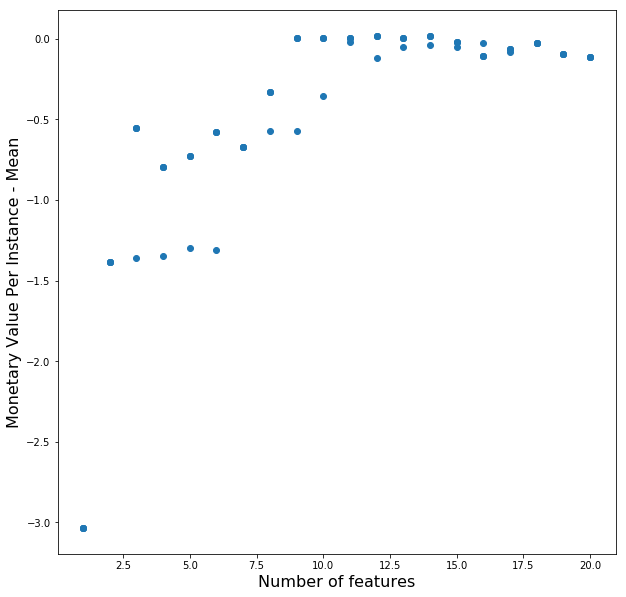

In [17]:
plot_number_features(result_table)

# Print performance of best 10 models

In [19]:
for rank in range(0,11):
    best = BestModel(rank)
    monetary_value = get_monetary_value(best)
    print()
    best.print_best_model()
    print("-----------------------------------------------------------------------------------------------")

True negative:  1753
False positive:  22
False negative:  0
True positive:  104
-30 for  1879  instances in the test set
-0.015965939329430547  per instance in the test set

SVC(C=4.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
['trustLevel' 'totalScanTimeInSeconds' 'lineItemVoids'
 'scansWithoutRegistration' 'valuePerSecond' 'lineItemVoidsPerPosition'
 'scannedLineItems' 'pricePerScannedLineItem'
 'scansWithoutRegistrationPerScannedLineItem'
 'quantityModificationsPerScannedLineItem' 'lineItemVoidsPerSecond'
 'quantityModificationsPerSecond']
-----------------------------------------------------------------------------------------------
True negative:  1753
False positive:  22
False negative:  0
True positive:  104
-30 for  1879  instances in the test set
-0.015965939329430547  per instance in the test set

SV